For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:

pip install vega_datasets

In [431]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from vega_datasets import data

import warnings
warnings.filterwarnings("ignore")

In [667]:
dir(data)

['7zip',
 'airports',
 'anscombe',
 'barley',
 'birdstrikes',
 'budget',
 'budgets',
 'burtin',
 'cars',
 'climate',
 'co2_concentration',
 'countries',
 'crimea',
 'disasters',
 'driving',
 'earthquakes',
 'ffox',
 'flare',
 'flare_dependencies',
 'flights_10k',
 'flights_200k',
 'flights_20k',
 'flights_2k',
 'flights_3m',
 'flights_5k',
 'flights_airport',
 'gapminder',
 'gapminder_health_income',
 'gimp',
 'github',
 'graticule',
 'income',
 'iowa_electricity',
 'iris',
 'jobs',
 'la_riots',
 'londonBoroughs',
 'londonCentroids',
 'londonTubeLines',
 'lookup_groups',
 'lookup_people',
 'miserables',
 'monarchs',
 'movies',
 'normal_2d',
 'obesity',
 'points',
 'population',
 'population_engineers_hurricanes',
 'seattle_temps',
 'seattle_weather',
 'sf_temps',
 'sp500',
 'stocks',
 'udistrict',
 'unemployment',
 'unemployment_across_industries',
 'us_10m',
 'us_employment',
 'us_state_capitals',
 'weather',
 'weball26',
 'wheat',
 'world_110m',
 'zipcodes']

from vega_datsets import data


data.sf_temps()

Use the above dataset for the exercises below:

- Resample by the day and take the average temperature. Visualize the average temperature over time.
- Write the code necessary to visualize the minimum temperature over time.
- Write the code necessary to visualize the maximum temperature over time.
- Which month is the coldest, on average?
- Which month has the highest average temperature?
- Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
- Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [385]:
df = data.sf_temps()

In [4]:
df.shape

(8759, 2)

In [386]:
df = df.set_index("date")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 1 columns):
temp    8759 non-null float64
dtypes: float64(1)
memory usage: 136.9 KB


##### Resample by the day and take the average temperature. Visualize the average temperature over time.

In [18]:
df.resample("D").mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
2010-01-06,49.529167
2010-01-07,49.466667
2010-01-08,49.475000
2010-01-09,49.537500


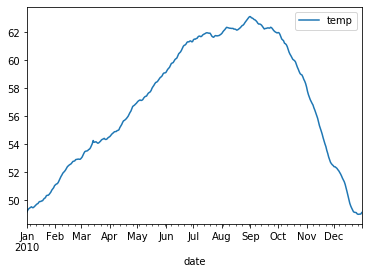

In [22]:
df.resample("D").mean().plot()
plt.show()

##### Write the code necessary to visualize the minimum temperature over time.

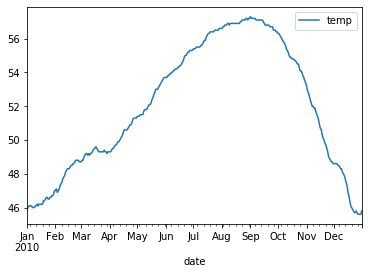

In [37]:
df.resample("D").min().plot()
plt.show()

##### Write the code necessary to visualize the maximum temperature over time.


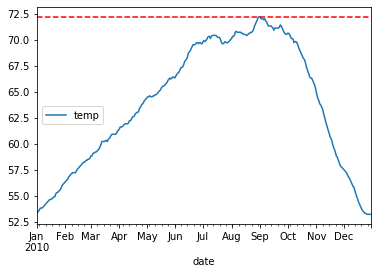

In [193]:
ax = df.resample("D").max().plot()
max_temp = df.resample("D").max().temp.max()
ax.axhline(max_temp, color="r", ls="--")
plt.show()

##### Which month is the coldest, on average?


In [625]:
df.resample("M").mean().temp.sort_values().head(1)

date
2010-01-31    49.98414
Name: temp, dtype: float64

##### Which month has the highest average temperature?

In [626]:
df.resample("M").mean().temp.sort_values().tail(1)

date
2010-09-30    62.487083
Name: temp, dtype: float64

##### Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [197]:
df_temp = df.resample("D").agg(["min","max"])
df_temp.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [198]:
df_temp["change"] = df_temp["temp"]["max"] - df_temp["temp"]["min"]
df_temp.head()

temp       change
             min   max       
date                         
2010-01-01  45.8  53.3    7.5
2010-01-02  46.0  53.4    7.4
2010-01-03  46.1  53.5    7.4
2010-01-04  46.1  53.6    7.5
2010-01-05  46.1  53.8    7.7

In [634]:
df_temp.resample("M").mean().change.sort_values().tail(1)

date
2010-09-30    14.403333
Name: change, dtype: float64

##### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

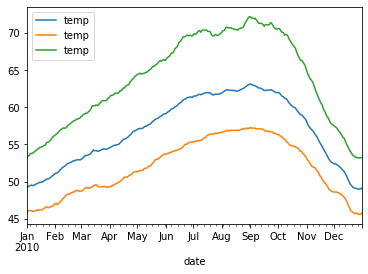

In [635]:
ax = df.resample('D').mean().plot()
df.resample('D').min().plot(ax=ax)
df.resample('D').max().plot(ax=ax)
plt.show()

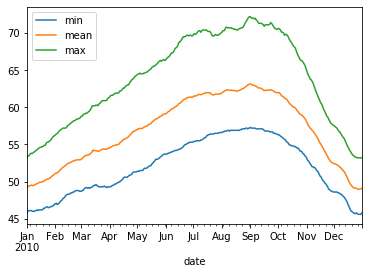

In [644]:
df.temp.resample("D").agg(["min","mean","max"]).plot()
plt.show()

from vega_datasets import data

data.seattle_weather()

Use the dataset to answer the following questions:

- Which year and month combination has the highest amount of precipitation?
- Visualize the amount of monthly precipitation over time.
- Visualize the amount of wind over time. Choose a time interval you think is appropriate.
- Which year-month combination is the windiest?
- What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
- In which month does it rain the most?
- Which month has the most number of days with a non-zero amount of precipitation?

In [646]:
df = data.seattle_weather()

In [647]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
date             1461 non-null datetime64[ns]
precipitation    1461 non-null float64
temp_max         1461 non-null float64
temp_min         1461 non-null float64
wind             1461 non-null float64
weather          1461 non-null object
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [648]:
df = df.set_index("date")

##### Which year and month combination has the highest amount of precipitation?

In [649]:
df.resample("M").sum().precipitation.sort_values().tail(1)

date
2015-12-31    284.5
Name: precipitation, dtype: float64

##### Visualize the amount of monthly precipitation over time.

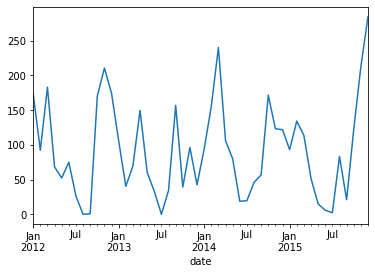

In [650]:
df.resample("M").sum().precipitation.plot()
plt.show()

##### Visualize the amount of wind over time. Choose a time interval you think is appropriate.

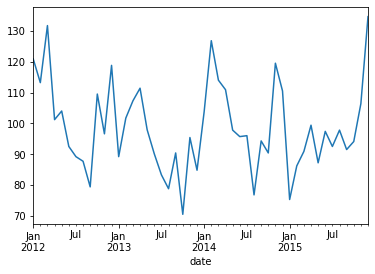

In [651]:
df.resample("M").sum().wind.plot()
plt.show()

##### Which year-month combination is the windiest?

In [652]:
df.resample("M").sum().wind.sort_values().tail(1)

date
2015-12-31    134.6
Name: wind, dtype: float64

##### What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [653]:
df [df.weather == "sun"].resample("Y").count().weather.sort_values().tail(1)

date
2014-12-31    211
Name: weather, dtype: int64

##### In which month does it rain the most?

In [365]:
df.precipitation.groupby(df.index.month).sum().sort_values().tail(1)

date
11    642.5
Name: precipitation, dtype: float64

In [660]:
df.groupby(df.index.strftime('%B')).sum().precipitation

April        375.4
August       163.7
December     622.7
February     422.0
January      466.0
July          48.2
June         132.9
March        606.2
May          207.5
November     642.5
October      503.4
September    235.5
Name: precipitation, dtype: float64

##### Which month has the most number of days with a non-zero amount of precipitation?

In [374]:
df [df.precipitation != 0].groupby(df [df.precipitation != 0].index.month).precipitation.count().sort_values().tail(1)

date
12    81
Name: precipitation, dtype: int64

In [663]:
df.groupby(df.index.strftime("%B")).sum()

,precipitation,temp_max,temp_min,wind
April,375.4,1802.4,763.5,422.9
August,163.7,3237.9,1831.4,341.1
December,622.7,1016.1,412.3,448.7
February,422.0,1114.2,458.2,427.9
January,466.0,1020.4,334.4,389.2
July,48.2,3223.8,1760.5,361.0
June,132.9,2688.0,1469.3,375.7
March,606.2,1536.0,602.5,443.9
May,207.5,2392.7,1192.2,386.9
November,642.5,1322.8,564.2,417.9


data.flights_20k()

- Convert any negative delays to 0.
- Which hour of the day has the highest average delay?
- Does the day of the week make a difference in the delay amount?
- Does the month make a difference in the delay amount?

In [724]:
df = data.flights_20k()

In [725]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
date           20000 non-null datetime64[ns]
delay          20000 non-null int64
destination    20000 non-null object
distance       20000 non-null int64
origin         20000 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.3+ KB


In [726]:
df

,date,delay,destination,distance,origin
0,2001-01-13 14:56:00,32,SJC,417,SAN
1,2001-01-31 16:40:00,-5,ISP,1093,FLL
2,2001-02-11 18:39:00,3,DAL,293,LBB
3,2001-01-10 21:00:00,-15,MCO,550,MSY
4,2001-03-30 21:45:00,-2,IND,229,STL
5,2001-03-14 14:55:00,3,MDW,405,MCI
6,2001-03-14 19:04:00,20,PHX,1999,BWI
7,2001-01-22 09:05:00,0,SAN,628,ABQ
8,2001-01-30 19:15:00,22,BUR,358,SMF
9,2001-01-27 07:00:00,-13,BWI,588,BNA


In [727]:
df = df.set_index("date")

##### Convert any negative delays to 0.

In [728]:
df.delay [df.delay < 0] = 0 

In [729]:
df.head()

,delay,destination,distance,origin
date,,,,
2001-01-13 14:56:00,32,SJC,417,SAN
2001-01-31 16:40:00,0,ISP,1093,FLL
2001-02-11 18:39:00,3,DAL,293,LBB
2001-01-10 21:00:00,0,MCO,550,MSY
2001-03-30 21:45:00,0,IND,229,STL


##### Which hour of the day has the highest average delay?

In [675]:
df.delay.groupby(df.index.hour).mean().sort_values().tail(1)

date
3    302.5
Name: delay, dtype: float64

##### Does the day of the week make a difference in the delay amount?

In [676]:
df.delay.groupby(df.index.strftime("%a")).mean()

Fri    17.757596
Mon     7.165772
Sat     8.431498
Sun    10.413542
Thu    12.821322
Tue     9.410866
Wed    11.032478
Name: delay, dtype: float64

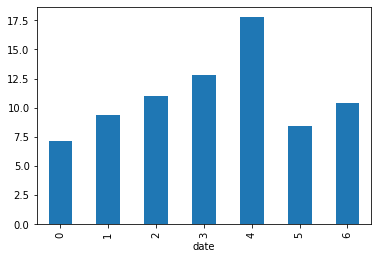

In [680]:
df.delay.groupby(df.index.weekday).mean().plot.bar()
plt.show()

##### Does the month make a difference in the delay amount?

In [468]:
df.delay.resample("M").mean()

date
2001-01-31    11.301592
2001-02-28    12.306106
2001-03-31     9.875287
Freq: M, Name: delay, dtype: float64

data.iowa_electricity()

- For each row, calculate the percentage of the year's total that energy source provided.
- Lineplot of generation over time, color by source
- Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
- Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
- Is the total generation increasing over time?
- How would you control for increasing consumption over time when considering how much energy is coming from each source?
express each number as a % of the year's total

In [730]:
df = data.iowa_electricity()

In [731]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
year              51 non-null datetime64[ns]
source            51 non-null object
net_generation    51 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [732]:
df.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [733]:
df = df.set_index("year")

##### For each row, calculate the percentage of the year's total that energy source provided.

In [734]:
df["year_total"] =df.groupby("year").net_generation.transform("sum")
df["percent_total"] = df.net_generation / df.year_total
df

,source,net_generation,year_total,percent_total
year,,,,
2001-01-01,Fossil Fuels,35361,40651,0.869868
2002-01-01,Fossil Fuels,35991,42528,0.846290
2003-01-01,Fossil Fuels,36234,42107,0.860522
2004-01-01,Fossil Fuels,36205,43236,0.837381
2005-01-01,Fossil Fuels,36883,44145,0.835497
2006-01-01,Fossil Fuels,37014,45473,0.813978
2007-01-01,Fossil Fuels,41389,49778,0.831472
2008-01-01,Fossil Fuels,42734,53086,0.804996
2009-01-01,Fossil Fuels,38620,51859,0.744712


##### Lineplot of generation over time, color by source

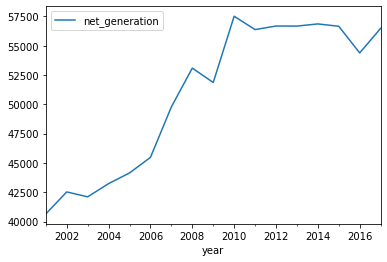

In [692]:
df.resample("Y").sum().plot()
plt.show()

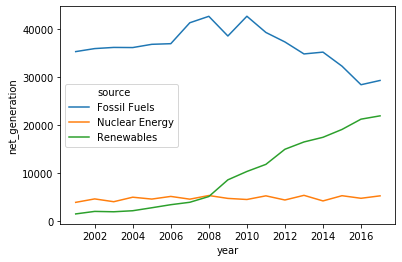

In [698]:
import seaborn as sns

sns.lineplot(data=df.reset_index(), x="year", y="net_generation",hue="source")
plt.show()

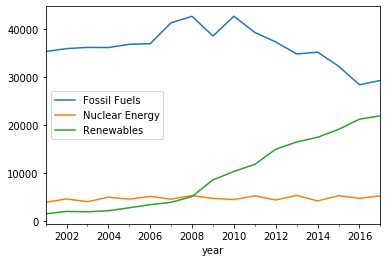

In [585]:
df[df.source == "Fossil Fuels"].net_generation.plot(label ="Fossil Fuels")
df[df.source == "Nuclear Energy"].net_generation.plot(label="Nuclear Energy")
df[df.source == "Renewables"].net_generation.plot(label="Renewables")
plt.legend()
plt.show()

##### Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [701]:
df.pivot_table("net_generation", "year", "source")

source,Fossil Fuels,Nuclear Energy,Renewables
year,,,
2001-01-01,35361,3853,1437
2002-01-01,35991,4574,1963
2003-01-01,36234,3988,1885
2004-01-01,36205,4929,2102
2005-01-01,36883,4538,2724
2006-01-01,37014,5095,3364
2007-01-01,41389,4519,3870
2008-01-01,42734,5282,5070
2009-01-01,38620,4679,8560


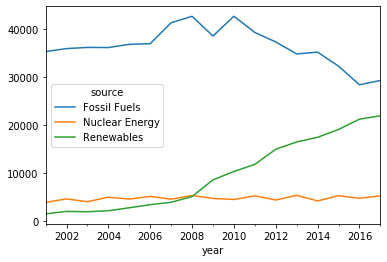

In [706]:
df.pivot_table("net_generation", "year", "source").plot()
plt.show()

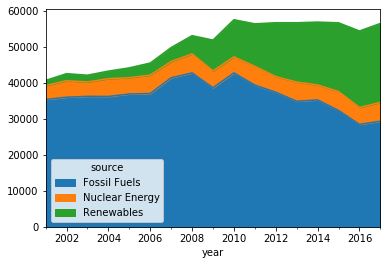

In [709]:
df.pivot_table("net_generation", "year", "source").plot.area()
plt.show()

##### Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

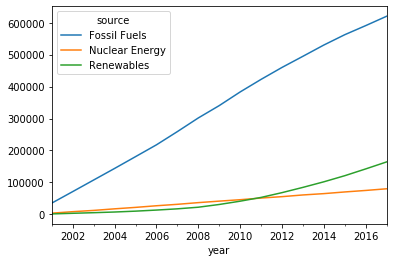

In [712]:
df.pivot_table("net_generation", "year", "source").cumsum().plot()
plt.show()

##### Is the total generation increasing over time?

> yes

##### How would you control for increasing consumption over time when considering how much energy is coming from each source? express each number as a % of the year's total

Use the sf_temps dataset
- Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)
- How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.
- Create pretty labels for time plots
- Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

In [742]:
df = data.sf_temps()

In [743]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
temp    8759 non-null float64
date    8759 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 136.9 KB


,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [744]:
df = df.set_index("date")

##### Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

In [747]:
df["feels"] = pd.qcut(df.temp,4,labels=["cold","cool","warm","hot"])
df.head()

,temp,feels
date,,
2010-01-01 00:00:00,47.8,cold
2010-01-01 01:00:00,47.4,cold
2010-01-01 02:00:00,46.9,cold
2010-01-01 03:00:00,46.5,cold
2010-01-01 04:00:00,46.0,cold


##### How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

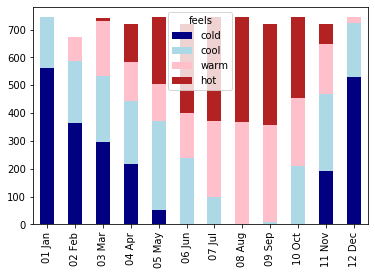

In [761]:
(df
 .groupby([df.index.strftime("%m %b"), "feels"]).count()
 .unstack()
 .fillna(0)
 .temp
 .plot.bar(
     stacked=True,
     color=["navy","lightblue","pink","firebrick"]
 )
)
plt.show()

##### Create pretty labels for time plots

##### Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar